In [28]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,roc_auc_score
from datetime import datetime as dt
from datetime import date
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xg
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [3]:
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Home_LLC_Project')
os.listdir()
data =pd.read_csv('/content/drive/MyDrive/Home_LLC_Project/kc_house_data.csv')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.describe(include=[np.number])


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
data.isnull().sum()  #Data not having any NaNs

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

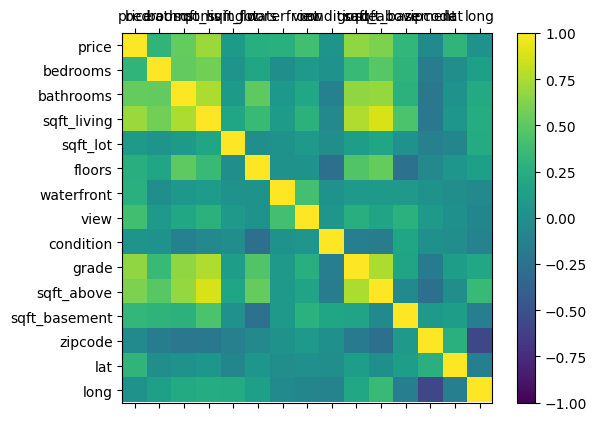

In [6]:
names=['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','zipcode','lat','long']
df=data[names]
correlations= df.corr()
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)
ticks=np.arange(0,15,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

Top 5 features:



*  bedrooms
*  bathrooms

*   sqft_living
*   sqft_above

*   grade


Now Let's convert nominal and ordinal features into category.










In [8]:
# Converting columns to ordered categorical data
categories = [True, False]  # Example categories
df['waterfront'] = pd.Categorical(df['waterfront'], categories=categories, ordered=True)
df['view'] = pd.Categorical(df['view'], ordered=True)
df['condition'] = pd.Categorical(df['condition'], ordered=True)
df['grade'] = pd.Categorical(df['grade'], ordered=False)
df['zipcode'] = pd.Categorical(df['zipcode'], ordered=False)

print(df.dtypes)  # Checking data types

price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront       category
view             category
condition        category
grade            category
sqft_above          int64
sqft_basement       int64
zipcode          category
lat               float64
long              float64
dtype: object


<ipython-input-8-74241d04138d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['waterfront'] = pd.Categorical(df['waterfront'], categories=categories, ordered=True)
<ipython-input-8-74241d04138d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['view'] = pd.Categorical(df['view'], ordered=True)
<ipython-input-8-74241d04138d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

<Axes: xlabel='sqft_living', ylabel='price'>

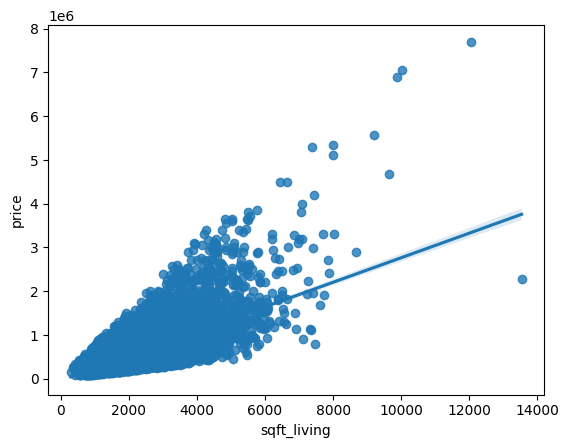

In [9]:
#sns.set_style()
sns.regplot(x='sqft_living',y='price',data=data)

<Axes: xlabel='sqft_basement', ylabel='price'>

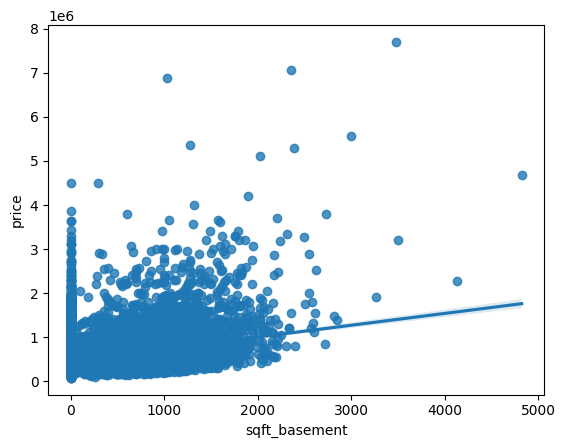

In [10]:
sns.regplot(x='sqft_basement',y='price',data=data)


<Axes: xlabel='sqft_above', ylabel='price'>

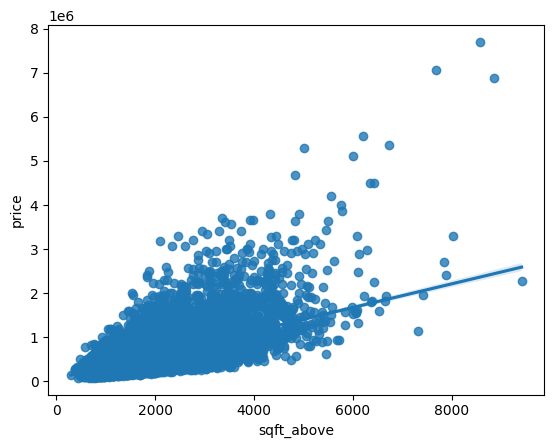

In [11]:
sns.regplot(x='sqft_above',y='price',data=data)


<Axes: xlabel='bedrooms', ylabel='price'>

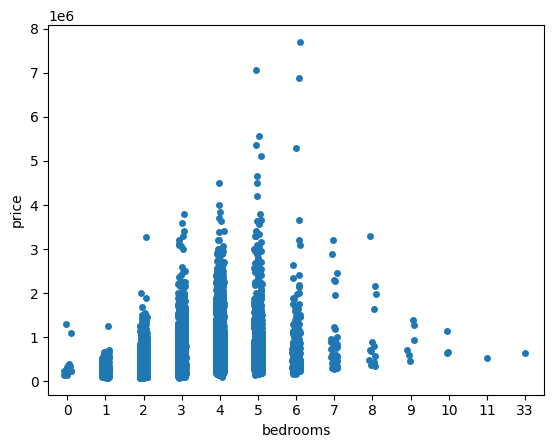

In [12]:
sns.stripplot(x='bedrooms', y='price',data=data)


The graph indicates that the relation of price with bedrooms. Price goes up with number of bedrooms upto 6 and then comes down as no of bedrooms increase.

<Axes: xlabel='bathrooms', ylabel='price'>

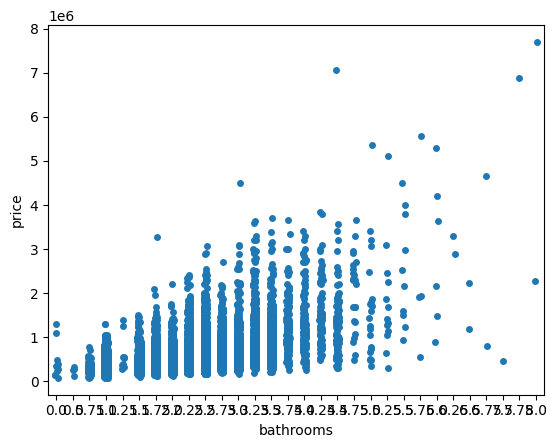

In [13]:
sns.stripplot(x='bathrooms', y='price',data=data, size=5)


<Axes: xlabel='grade', ylabel='price'>

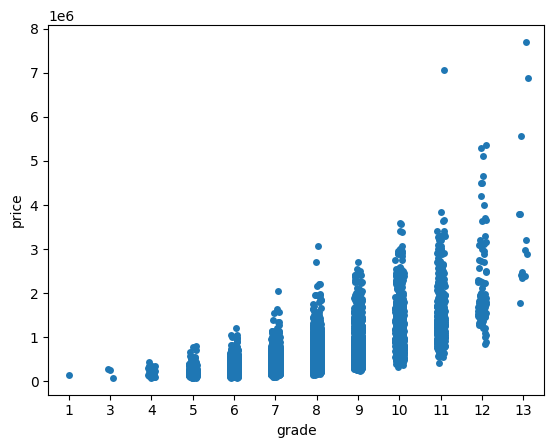

In [14]:
sns.stripplot(x='grade', y='price',data=data, size=5)


Price of the house is dependent on grade of the house, higher the grade higher the price.

We can remove outliers from data like house with bedrooms > 9 and bathrooms>7.

In [16]:
data=data[data['bedrooms'] < 10]
data=data[data['bathrooms']<8]



In [17]:
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [18]:
c=['bedrooms','bathrooms','sqft_living','sqft_above','grade']
df=data[c]

In [19]:
df=pd.get_dummies(df,columns=['grade'], drop_first=True)

In [20]:
y=data['price']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(df,y,train_size=0.8,random_state=42)


In [22]:
x_train.head()


,bedrooms,bathrooms,sqft_living,sqft_above,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
19151,3,2.50,1830,1830,0,0,0,0,0,1,0,0,0,0,0
6248,4,2.50,2310,2310,0,0,0,0,0,1,0,0,0,0,0
13665,4,1.50,1800,1800,0,0,0,0,1,0,0,0,0,0,0
7241,4,2.50,2740,2740,0,0,0,0,0,1,0,0,0,0,0
17293,3,1.75,1280,1030,0,0,0,0,0,1,0,0,0,0,0


In [23]:
reg=LinearRegression()


In [24]:
reg.fit(x_train,y_train)

LinearRegression()

In [25]:
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [-2.40123752e+04  1.18612408e+03  2.33256303e+02 -9.39663792e+01
  4.46669342e+04  5.62905144e+04  6.16023467e+04  8.28966221e+04
  1.14383769e+05  1.87484516e+05  3.32521890e+05  5.28281249e+05
  8.30136022e+05  1.33105258e+06  2.03634349e+06]


In [29]:
print(metrics.mean_squared_error(y_test, reg.predict(x_test)))

58127859345.848854


In [30]:
reg.score(x_test,y_test)

0.5945984881530678

**With all paramaeters**

In [31]:
df=pd.get_dummies(data,columns=['waterfront','view','condition','grade','zipcode'], drop_first=True)

In [32]:
y=data['price']
df= df.drop(['date','id','price'],axis=1)

In [33]:
x_train,x_test,y_train,y_test=train_test_split(df,y,train_size=0.8,random_state=42)

In [34]:
reg.fit(x_train,y_train)

LinearRegression()

In [35]:
print('Coefficients: \n', reg.coef_)
print(metrics.mean_squared_error(y_test, reg.predict(x_test)))
print(reg.score(x_test,y_test))

Coefficients: 
 [-1.18025859e+04  2.70593630e+04  9.08459607e+01  2.93172867e-01
 -3.05692434e+04  7.30214828e+01  1.78263628e+01 -3.12235365e+02
  2.23257682e+01  2.09995401e+05 -1.81883456e+05  1.58192089e+01
 -1.60485981e-01  5.48449910e+05  9.31119434e+04  7.70645161e+04
  1.41845767e+05  3.16325283e+05  8.49873165e+04  8.86505984e+04
  1.14725919e+05  1.55270791e+05  2.93558569e+04 -4.75961574e+04
 -8.94459067e+04 -9.16071923e+04 -8.70326693e+04 -6.54273301e+04
  1.01981388e+04  1.26788640e+05  3.29639353e+05  7.22652598e+05
  1.37781046e+06  1.97257061e+04 -1.13142158e+04  7.21991910e+05
  2.68320779e+05  2.22864488e+05  2.17452669e+05  2.30361113e+05
  1.04526124e+05  5.43013340e+04  8.90998085e+04  6.86311744e+04
  6.35836887e+04 -4.22072089e+04  1.73142557e+05  1.66442232e+05
  4.64115200e+04  2.20872038e+05  1.40052419e+04  1.46347047e+04
 -1.10977067e+04  2.98379235e+05  1.28687539e+05  7.00585243e+04
  1.11473591e+06  4.65325216e+05  2.40451887e+04  1.58071661e+05
  1.95056



*   Mean Square Error: 24035065564.4
*   R-square: 0.832372084112


